In [2]:
from sympy import *
init_printing() 
%matplotlib inline

In [3]:
x, y, z = symbols('x y z')

In [4]:
a, b = symbols('a b')

In [5]:
exp(x)

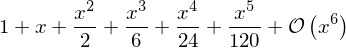

In [6]:
exp(x).series(x)

### ODE

http://docs.sympy.org/dev/modules/solvers/ode.html
    
    
    


In [7]:
f, g = symbols('f g', cls=Function)

In [8]:
f(x)

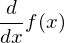

In [9]:
 f(x).diff(x)

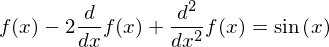

In [10]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq


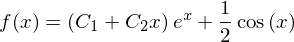

In [11]:
dsolve(diffeq, f(x))

In [12]:
x=symbols('x')
f=symbols('f', cls=Function)


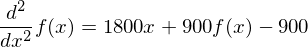

In [13]:
Eq(f(x).diff(x,x), 900*(f(x)-1+2*x))

In [14]:
dsolve(Eq(f(x).diff(x,x), 900*(f(x)-1+2*x)), f(x), ics={f(0):5, f(2):10})

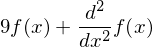

In [15]:
eq = Derivative(f(x), x, x) + 9*f(x)
eq

In [16]:
f = Function('f')
dsolve(Derivative(f(x), x, x) + 9*f(x), f(x))


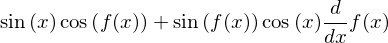

In [17]:
eq = sin(x)*cos(f(x)) + cos(x)*sin(f(x))*f(x).diff(x)

eq

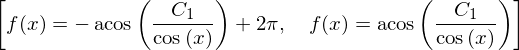

In [18]:
dsolve(eq, hint='1st_exact')

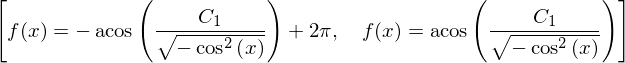

In [19]:
dsolve(eq, hint='almost_linear')

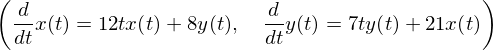

In [20]:


t = symbols('t')
x, y = symbols('x, y', function=True)
eq = (Eq(Derivative(x(t),t), 12*t*x(t) + 8*y(t)), Eq(Derivative(y(t),t), 21*x(t) + 7*t*y(t)))


eq

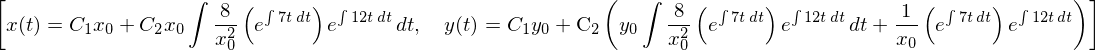

In [21]:
dsolve(eq)

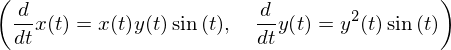

In [22]:
eq = (Eq(Derivative(x(t),t),x(t)*y(t)*sin(t)), Eq(Derivative(y(t),t),y(t)**2*sin(t)))
eq

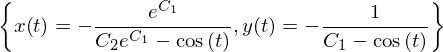

In [23]:
dsolve(eq)

### System of rabbit and fox


http://sam-dolan.staff.shef.ac.uk/mas212/docs/Solutions4.html


x : rabbits

y: foxes



$$% <![CDATA[
\begin{align*}
\frac{dx}{dt} &= a*x - b*x*y \\
\frac{dy}{dt} &= -c*y + d*x*y
\end{align*} %]]>$$



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline
plt.rcParams.update({'font.size': 14})  # Make the labels larger

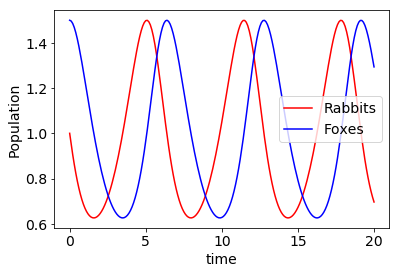

In [25]:
a,b,c,d = 1,1,1,1

def predprey(X, t):
    # X is an array with two elements. The function should return an array of the derivatives of these elements.
    x = X[0]; # rabbits
    y = X[1]; # foxes
    dxdt =  a*x - b*x*y
    dydt = -c*y + d*x*y
    return np.array([dxdt, dydt])

h = 0.1; tmax = 20.0; tmin = 0.0;
n = int((tmax-tmin)/h); ts = np.linspace(tmin, tmax, n+1);

ic = (1.0, 1.5)  # initial conditions: (rabbits, foxes).
Xs = odeint(predprey, ic, ts)
# Note that odeint returns a 2D array with 2 columns. 
# Rabbits in the first column, foxes in the second. 
plt.plot(ts, Xs[:,0], 'r-', label="Rabbits");
plt.plot(ts, Xs[:,1], 'b-', label="Foxes");
plt.xlabel("time"); plt.ylabel("Population"); plt.legend();

## Change Initial number of foxes

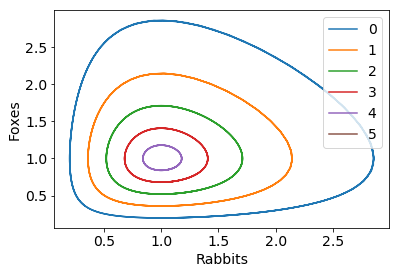

In [37]:


#  a phase portrait
r0 = 1.0;  # Initial number of rabbits
nseries = 6;  # number of curves on the phase plot
fs = np.linspace(0.2, 1, nseries)  # Initial number of foxes
for k in range(nseries):
    Xs = odeint(predprey, (r0, fs[k]), ts)
    plt.plot(Xs[:,0], Xs[:,1], label= k);

plt.xlabel("Rabbits"); plt.ylabel("Foxes");
plt.legend();

## varying parameter 'b', the appetite of the foxes

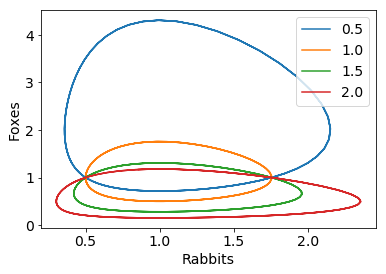

In [39]:
#  Try varying parameter 'b', the appetite of the foxes
def predprey2(X, t, b=1.0):  # Make b an optional parameter
    x = X[0]; y = X[1]; 
    dxdt =  a*x - b*x*y
    dydt = -c*y + d*x*y
    return np.array([dxdt, dydt])

bs = np.linspace(0.5, 2.0, 4)
ic = (0.5, 1.0)  # Try starting with this initial condition
for bval in bs:
    # Pass the value of the 'b' parameter through to predprey2 using the optional argument 'args'
    Xs = odeint(predprey2, ic, ts, args=(bval,))
    plt.plot(Xs[:,0], Xs[:,1], label = bval);
plt.xlabel("Rabbits"); plt.ylabel("Foxes");
# Changing 'b' changes the position of the stable equilibrium.
plt.legend();

### System of fish and boats


ODE in scipy

http://www.danham.me/r/2015/10/29/differential-eq.html


$$% <![CDATA[
\begin{align*}
\frac{dx}{dt} &= x(2 - y - x) \\
\frac{dy}{dt} &= -y(1 - 1.5x)
\end{align*} %]]>$$


built-in SciPy function odeint to solve the system of ordinary differential equations, which relies on lsoda from the FORTRAN library odepack. First, we define a callable function to compute the time derivatives for a given state, indexed by the time period. We also load libraries that we’ll use later to animate the results.


$$% <![CDATA[
\begin{align*}
\frac{dx}{dt} = 0 &\implies y = 2 - x \\
\frac{dy}{dt} = 0 &\implies x = 2/3
\end{align*} %]]>$$




In [28]:
import matplotlib.animation as animation
from scipy.integrate import odeint
from numpy import arange
from pylab import *

def BoatFishSystem(state, t):
    fish, boat = state
    d_fish = fish * (2 - boat - fish)
    d_boat = -boat * (1 - 1.5 * fish)
    return [d_fish, d_boat]

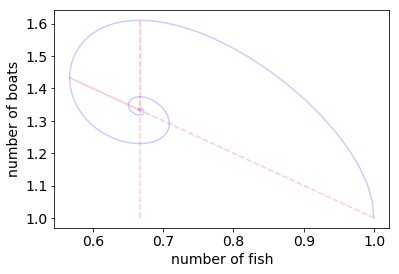

In [29]:
t = arange(0, 20, 0.1)
init_state = [1, 1]
state = odeint(BoatFishSystem, init_state, t)

fig = figure()
xlabel('number of fish')
ylabel('number of boats')
plot(state[:, 0], state[:, 1], 'b-', alpha=0.2)
plot(state[:, 0], 2-state[:, 0], 'r--', alpha=0.2)
plot(np.ones(len(state[:,0]))*2/3, state[:, 1], 'r--', alpha=0.2)
#axvline(x=2/3, color='r', alpha=0.2)
show()

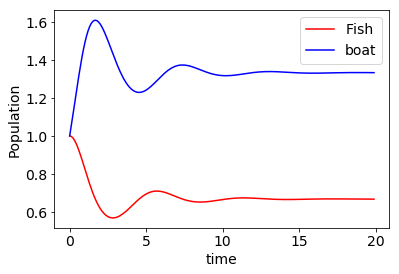

In [30]:
# Note that odeint returns a 2D array with 2 columns. 
# Fish in the first column, boats in the second. 
plt.plot(t, state[:,0], 'r-', label="Fish");
plt.plot(t, state[:,1], 'b-', label="boat");
plt.xlabel("time"); plt.ylabel("Population"); plt.legend();



The red, dashed lines indicate the nullclines, derived from the first-order conditions of the equation system. These lines delineate the phase space of the top graph; and the lines intersect at the equilibrium levels of fish and boats.



$$% <![CDATA[
\begin{align*}
\frac{dx}{dt} = 0 &\implies y = 2 - x \\
\frac{dy}{dt} = 0 &\implies x = 2/3
\end{align*} %]]>$$




![](http://www.danham.me/images/differential-animated-dual.gif)










### Linear approximated system near the equilibrium () 


Suppose we wanted to figure out the behavior of this system near the equilibrium before going through the numerical estimation. First, we linearize the system near the equilibrium, yielding the Jacobian. Let $f(x,y)=dx/dt$ and $g(x,y)=dy/dt$, then the nonlinear system can be approximated by the following linear system near the equilibrim (x¯,y¯):


$$% <![CDATA[
\begin{align*}
f(x, y) &\approx f(\bar{x}, \bar{y}) + \frac{\partial f(\bar{x}, \bar{y})}{\partial x}\left(x - \bar{x}\right) + \frac{\partial f(\bar{x}, \bar{y})}{\partial y}\left(y - \bar{y}\right)\\
g(x, y) &\approx g(\bar{x}, \bar{y}) + \frac{\partial g(\bar{x}, \bar{y})}{\partial x}\left(x - \bar{x}\right) + \frac{\partial g(\bar{x}, \bar{y})}{\partial y}\left(y - \bar{y}\right)
\end{align*} %]]>$$



Noting that f(x¯,y¯)=g(x¯,y¯)=0 by definition of the equilibrium, the nonlinear system is approximated by the linear system defined by the Jacobian, evaluated at the equilibrium:



$$% <![CDATA[
\left( 
\begin{array}{cc} 
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{array}
\right)
= 
\left( 
\begin{array}{cc} 
2 - y - 2x & -x \\
1.5y & 1 - 1.5x
\end{array}
\right)
= 
\left( 
\begin{array}{cc} 
-\frac{2}{3} & -\frac{2}{3} \\
2 & 0
\end{array}
\right) %]]>$$

Then the eigenvalues λ are given by:


$$% <![CDATA[
\left|
\begin{array}{cc} 
-\frac{2}{3} - \lambda & -\frac{2}{3} \\
2 & -\lambda
\end{array}
\right| 
= 0 
\implies 
\lambda^{2} + \frac{2}{3}\lambda + \frac{4}{3} 
= 0
\implies
\lambda = -\frac{2}{3} \pm i\sqrt{\frac{44}{9}} %]]>$$



The real part is negative and there is an imaginary component, such that the system will oscillate around the equilibrium tending inward. This behavior is reflected in the animation. 



## Schaefer model

Bjorndal and Conrad (1987) modelled open-access exploitation of North Sea herring between 1963 - 1977. Their model is similar to the one above, except slightly more complicated. Let fish stock (x
) and fishing effort (y) be modelled by the following system:


$$% <![CDATA[
\begin{align*}
\frac{dx}{dt} &= gx\left(1 - \frac{x}{K}\right) - kxy \\
\frac{dy}{dt} &= kpx - c,
\end{align*} %]]>$$

where k is a catchability constant, g is the intrinsic growth rate of the fish stock, K is the carrying capacity, p is the fish price, and c is the marginal cost of one unit of effort. Then, through the same process as above, we find that the equilibrium point (at the intersection of the nullclines) is:

$$\left( \frac{c}{pk}, \frac{g}{k}\left( 1 - \frac{c}{pkK}\right) \right)$$


Using the constants in Bjorndal and Conrad (1987) we model the system similarly:





















In [31]:
price = 735
effort_scale = 2e-6
marginal_cost = 556380
carrying_capacity = 3.2e6
intrinsic_growth = 0.08
catchability = marginal_cost / (price * 0.25e6)

def BoatFishSystem(state, t, time_scale=1):
    stock, effort = state
    net_growth = intrinsic_growth * stock * (1 - (stock/carrying_capacity))
    harvest = catchability * stock * effort
    d_stock = net_growth - harvest
    d_effort = effort_scale * (price * catchability * stock - marginal_cost)
    return [d_stock * time_scale, d_effort * time_scale]


![](http://www.danham.me/images/differential-animated-schaefer.gif)

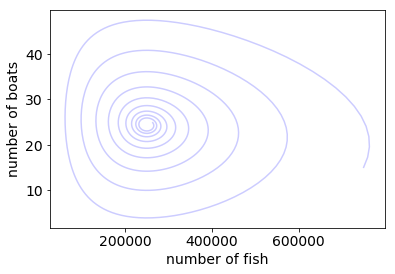

In [32]:
t = arange(0, 1000, 1)
init_state = [750000, 15]
state = odeint(BoatFishSystem, init_state, t)

fig = figure()
xlabel('number of fish')
ylabel('number of boats')
plot(state[:, 0], state[:, 1], 'b-', alpha=0.2)


show()

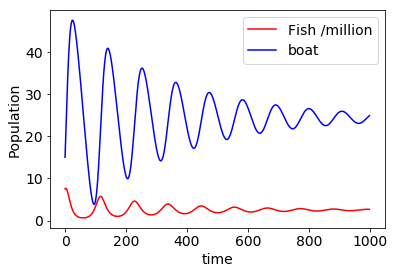

In [33]:
# Note that odeint returns a 2D array with 2 columns. 
# Fish in the first column, boats in the second. 
plt.plot(t, state[:,0]/100000, 'r-', label="Fish /million");
plt.plot(t, state[:,1], 'b-', label="boat");
plt.xlabel("time"); plt.ylabel("Population"); plt.legend();

The Jacobian for this system evaluated at the equilibrium is:

$$% <![CDATA[
\left( 
\begin{array}{cc} 
-\frac{gc}{pkK} & -kx \\
pk & 0
\end{array}
\right) %]]>$$

The eigenvalues are λ=−0.0031±41.0182i

. Once again, the behavior seen in the numerical approximation is confirmed by math. The system oscillates and tends inward.

 The numerical approximations, while very good in Python, can misrepresent the system of equations, given certain parameters. **Specifically, the system is solved through an iterative process of calculating the linear change at each interval, approximating the continuous system.** Choosing certain step sizes and tolerances will send Python or Matlab into a tailspin. Although, the checks and balances within odeint are really quite good, such that it’s way easier to break the numerical approximation if you try to write it explicitly in a for-loop.

The origin is a sink

http://ww2.math.buffalo.edu/306/py/306ch5.2_sinks.html

![](http://ww2.math.buffalo.edu/306/py/306ch5.2A2.png)

The origin is a source    
http://ww2.math.buffalo.edu/306/py/306ch5.2_sources.html    

![](http://ww2.math.buffalo.edu/306/py/306ch5.2B2.png)

The origin is a saddle

http://ww2.math.buffalo.edu/306/py/306ch5.2_saddles.html

![](http://ww2.math.buffalo.edu/306/py/306ch5.2C2.png)


The origin is a center


http://ww2.math.buffalo.edu/306/py/306ch5.2_centers.html

![](http://ww2.math.buffalo.edu/306/py/306ch5.2N2.png)


In [35]:
from numpy import linalg
values, vectors = linalg.eig(J_equil)
print( values)

NameError: name 'J_equil' is not defined

In [ ]:
from IPython.core.display import HTML, Image
css_file = '../../../../custom.css'
HTML(open(css_file, 'r').read())